In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

USE_SUBSET = True
SUBSET_SIZE = 100000

print("Завантаження датасету Yelp Review Polarity...")

!wget -q http://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
!tar -xzf yelp_review_polarity_csv.tgz

train_path = "yelp_review_polarity_csv/train.csv"
test_path = "yelp_review_polarity_csv/test.csv"

if USE_SUBSET:
    print(f"⚡ ШВИДКИЙ РЕЖИМ: {SUBSET_SIZE} зразків")
    train_df = pd.read_csv(train_path, header=None, names=["label", "text"], nrows=SUBSET_SIZE)
    test_df = pd.read_csv(test_path, header=None, names=["label", "text"], nrows=SUBSET_SIZE//5)
else:
    train_df = pd.read_csv(train_path, header=None, names=["label", "text"])
    test_df = pd.read_csv(test_path, header=None, names=["label", "text"])

print(f"Навчальних зразків: {train_df.shape[0]}")
print(f"Тестових зразків: {test_df.shape[0]}")

train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

vocab_size = 10000
max_sequence_length = 150

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["text"])

x_train = tokenizer.texts_to_sequences(train_df["text"])
x_test = tokenizer.texts_to_sequences(test_df["text"])

x_train = pad_sequences(x_train, maxlen=max_sequence_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_sequence_length, padding='post', truncating='post')

y_train = np.array(train_df["label"]) - 1
y_test = np.array(test_df["label"]) - 1





Завантаження датасету Yelp Review Polarity...
⚡ ШВИДКИЙ РЕЖИМ: 100000 зразків
Навчальних зразків: 100000
Тестових зразків: 20000


Форма x_train: (100000, 150)
Форма y_train: (100000,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 139s 383ms/step - accuracy: 0.6172 - loss: 0.6431 - val_accuracy: 0.7434 - val_loss: 0.5880 - learning_rate: 0.0010
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7591 - loss: 0.5455
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
352/352 ━━━━━━━━━━━━━━━━━━━━ 131s 373ms/step - accuracy: 0.7590 - loss: 0.5456 - val_accuracy: 0.6077 - val_loss: 0.6445 - learning_rate: 0.0010
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 131s 373ms/step - accuracy: 0.6197 - loss: 0.6377 - val_accuracy: 0.7954 - val_loss: 0.5063 - learning_rate: 5.0000e-04
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.6895 - loss: 0.5912
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
352/352 ━━━━━━━━━━━━━━━━━━━━ 131s 372ms/step - accuracy: 0.6895 - loss: 0.5912 - val_accuracy: 0.7609 - val_loss: 0.5156 - learning_rate: 5.0000e-04
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 132s 376ms/step - accu

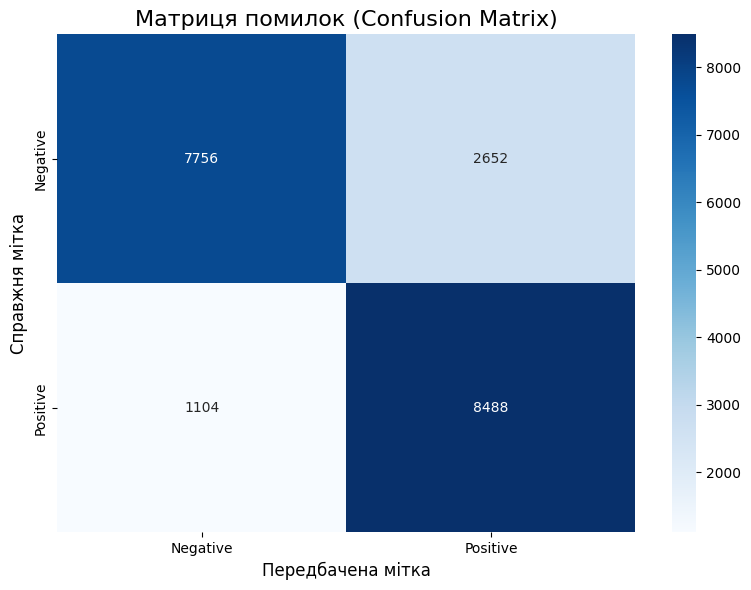

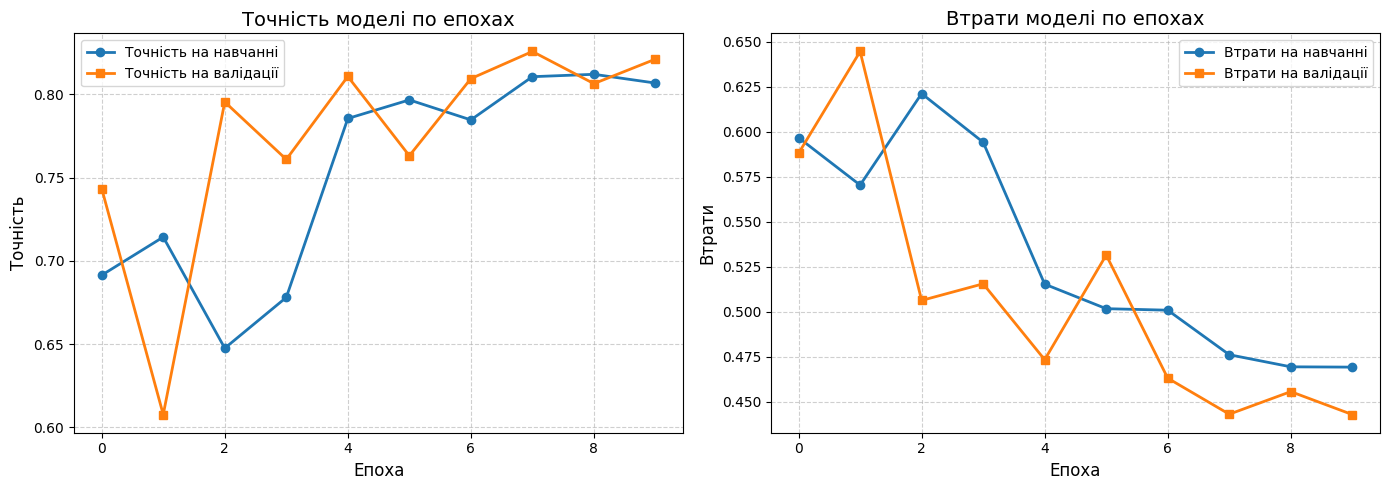

In [2]:
print(f"Форма x_train: {x_train.shape}")
print(f"Форма y_train: {y_train.shape}")

model = Sequential([
    Embedding(vocab_size, 64),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    min_lr=0.00001,
    verbose=1
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=256,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

y_pred = (model.predict(x_test, verbose=0) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nРЕЗУЛЬТАТИ ОЦІНКИ МОДЕЛІ")
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Negative', 'Positive'],
    yticklabels=['Negative', 'Positive']
)
plt.title("Матриця помилок (Confusion Matrix)", fontsize=16)
plt.xlabel("Передбачена мітка", fontsize=12)
plt.ylabel("Справжня мітка", fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на навчанні', linewidth=2, marker='o')
plt.plot(history.history['val_accuracy'], label='Точність на валідації', linewidth=2, marker='s')
plt.title('Точність моделі по епохах', fontsize=14)
plt.xlabel('Епоха', fontsize=12)
plt.ylabel('Точність', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на навчанні', linewidth=2, marker='o')
plt.plot(history.history['val_loss'], label='Втрати на валідації', linewidth=2, marker='s')
plt.title('Втрати моделі по епохах', fontsize=14)
plt.xlabel('Епоха', fontsize=12)
plt.ylabel('Втрати', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



In [4]:
sample_reviews = [
    "This restaurant was amazing! The food was delicious and the service was great.",
    "Terrible experience, I will never come back again.",
    "The movie was just okay, nothing special.",
    "Absolutely loved this place, 10/10!",
    "Worst food ever. Very disappointed.",
    "Outstanding quality and excellent customer service!",
    "Not worth the money, very poor experience.",
]

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_sequences = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

predictions = model.predict(sample_sequences, verbose=0)

print("Результати аналізу настроїв:")

for i, (review, prob) in enumerate(zip(sample_reviews, predictions), 1):
    sentiment = "Позитивний ✓" if prob > 0.5 else "Негативний ✗"
    confidence = prob[0] if prob > 0.5 else 1 - prob[0]
    print(f"\n{i}. Відгук: {review}")
    print(f"   Настрій: {sentiment} (Впевненість: {confidence:.2%})")


Результати аналізу настроїв:

1. Відгук: This restaurant was amazing! The food was delicious and the service was great.
   Настрій: Позитивний ✓ (Впевненість: 76.37%)

2. Відгук: Terrible experience, I will never come back again.
   Настрій: Негативний ✗ (Впевненість: 90.51%)

3. Відгук: The movie was just okay, nothing special.
   Настрій: Негативний ✗ (Впевненість: 90.51%)

4. Відгук: Absolutely loved this place, 10/10!
   Настрій: Позитивний ✓ (Впевненість: 76.37%)

5. Відгук: Worst food ever. Very disappointed.
   Настрій: Негативний ✗ (Впевненість: 90.51%)

6. Відгук: Outstanding quality and excellent customer service!
   Настрій: Позитивний ✓ (Впевненість: 76.37%)

7. Відгук: Not worth the money, very poor experience.
   Настрій: Негативний ✗ (Впевненість: 90.51%)
